Esse projeto é resultado do curso Estatística parte I disponibilizado pela Alura. O intuito é trabalhar os fundamentos de estatística em uma análise descritiva. 

# Sobre a Base de Dados
### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

Fonte: https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

Variáveis utilizadas: 
- Renda: Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.
- Idade: Idade do morador na data de referência em anos.
- UF: 
 
|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

- Sexo: 

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

- Anos de Estudo: 

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

- Cor:

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|


# Análise Descritiva

Importando as bibliotecas que utilizaremos ao longo de toda a análise descritiva. 

In [57]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats 

Adicionando nossa base de dados e realizando alguns tratamentos:

In [58]:
data = pd.read_csv('data.csv')
newColumns = {'UF': 'Locate', 
             'Sexo': 'Gender', 
             'Idade': 'Age', 
             'Cor': 'Color', 
             'Anos de Estudo': 'AgeStudy', 
             'Renda': 'Income'}
data.rename(columns=newColumns, inplace=True)
data

,Locate,Gender,Age,Color,AgeStudy,Income
0,11,0,23,8,12,800
1,11,1,23,2,12,1150
2,11,1,35,8,15,880
3,11,0,46,2,6,3500
4,11,1,47,8,9,150
...,...,...,...,...,...,...
76835,53,1,46,2,11,812
76836,53,0,30,4,7,1500
76837,53,0,32,8,12,1300
76838,53,0,57,8,4,1500


Geramos os dicionários que serão utilizados no decorrer deste dataset:


In [59]:
gender = {
    0: 'Masculino', 
    1: 'Feminino'
}
color = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
ageStudy = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
locate = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

## OBSERVAÇÃO
Vale lembrar que todas as análises e conclusões dentro desse projeto estão limitadas ao que o dataset disponibiliza. **Sendo qualquer conclusão ou palpite, fora do que o dataset disponibiliza, superficial**, já que falta muitas informações, como quantidade de horas trabalhadas, formação, área de atuação, cargo de atuação, etc.... 

A intenção deste projeto é a prática de uma análise descritiva, de forma imparcial, realizado o treino de fundamentos de Estatística, abordados no curso de Estatística: parte 1, disponibilizado pela Alura. 

A base foi disponibilizada pelo curso já com os seguintes tratamentos: 
1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
2. Foram eliminados os registros onde a **Renda** era missing;
3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

Foi removido também a coluna **Altura** que, no curso, é adicionada com dados fictícios. 

## Investigando a base

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Locate    76840 non-null  int64
 1   Gender    76840 non-null  int64
 2   Age       76840 non-null  int64
 3   Color     76840 non-null  int64
 4   AgeStudy  76840 non-null  int64
 5   Income    76840 non-null  int64
dtypes: int64(6)
memory usage: 3.5 MB


In [61]:
data.describe()

,Locate,Gender,Age,Color,AgeStudy,Income
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000


A média de renda é 2000 reais e a média de anos de estudo é aproximadamente 9.5 anos. Temos ao todo 76 840 dados coletados (pessoas).

## Idade

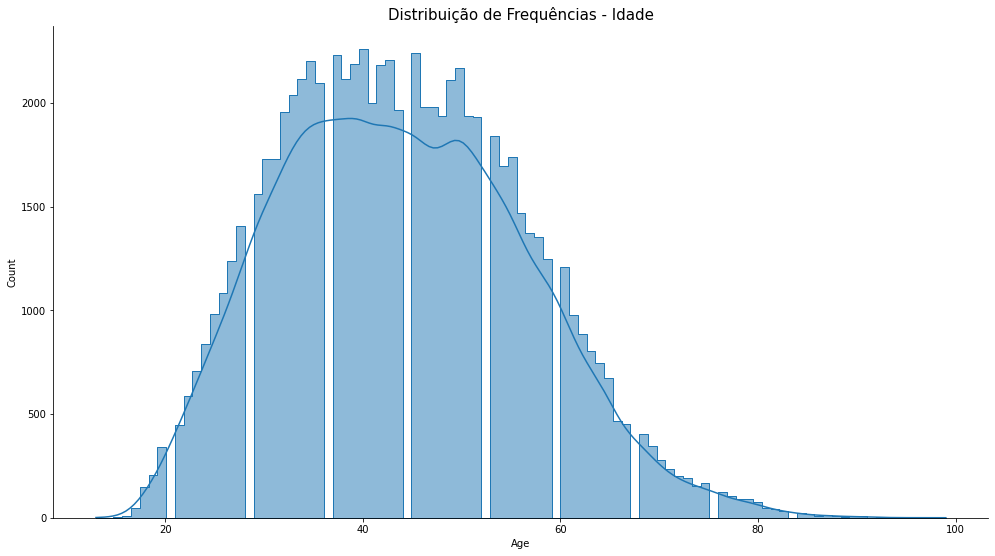

In [62]:
g = sb.displot(data.query('Income <=20000').Age, 
               element="step", 
               kde=True, 
               palette='blue')
g.fig.set_figwidth(16)
g.fig.set_figheight(8)
plt.title('Gráfico 01 - Distribuição de Frequências - Idade', size=15)
plt.show()

In [63]:
data.Age.mean()

44.07142113482561

In [64]:
data.Age.median()

43.0

In [65]:
data.Age.mode()[0]

40

### Conslusões
Em relação a idade, o fato da média, moda e mediana das idades serem bem próximas, nos mostra que temos uma distribuição quase que simétrica dos dados referente a Idade, o que é reforçado no gráfico 01.


## Gênero e Cor

In [122]:
data['Gender'].value_counts()

0    53250
1    23590
Name: Gender, dtype: int64

In [121]:
data['Gender'].value_counts(normalize=True)*100

0    69.299844
1    30.700156
Name: Gender, dtype: float64

In [66]:
genderColor = pd.crosstab(data.Gender, data.Color)
genderColor.rename(index = gender, inplace = True)
genderColor.rename(columns = color, inplace = True)
genderColor

Color,Indígena,Branca,Preta,Amarela,Parda
Gender,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [67]:
genderColor = pd.crosstab(data.Gender, data.Color, normalize= True) * 100
genderColor.rename(index = gender, inplace = True)
genderColor.rename(columns = color, inplace = True)
genderColor

Color,Indígena,Branca,Preta,Amarela,Parda
Gender,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


### Conclusões
Na base temos uma presença maior de pessoas do gênero masculino, o que representa 69.3%. Em relação a cor, 32.62% (cerca de 25k de pessoas) são do gênero masculino e cor Parda, sendo a maior quantidade da base. A segunda maior é do gênero Masculino e cor Branca sendo 28.88% (cerca de 22k de pessoas). A menor quantidade é do gênero Feminino na cor Amarela (0.15% das pessoas).

## Renda por Classes
O objetivo é avaliarmos o comportamento da variável **Renda** em diferentes aspectos. Inicialmente, vamos criar classes de salário mínimo e ver como as pessoas estão distribuidas nelas. As classes serão as seguintes:


*   A: acima de 25 salários mínimos
*   B: de 15 a 25 salários mínimos
*   C: de 5 a 15 salários mínimos
*   D: de 2 a 5 salários mínimos
*   E: Até 2 salários mínimos

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de **R$ 788,00**.



In [68]:
minimumWage = 788.00
classIncome = [data.Income.min(), 
               2*minimumWage, 
               5*minimumWage, 
               15*minimumWage, 
               25*minimumWage, 
               data.Income.max()]
classIncome

[0, 1576.0, 3940.0, 11820.0, 19700.0, 200000]

In [69]:
labelsClass = ['E', 'D', 'C', 'B', 'A']
frequencies = pd.cut(x=data.Income, 
                    bins=classIncome, 
                    labels = labelsClass, 
                    include_lowest = True).value_counts()
frequencies

E    49755
D    18602
C     7241
B      822
A      420
Name: Income, dtype: int64

In [70]:
percentage = pd.cut(x=data.Income, 
                   bins=classIncome, 
                   labels = labelsClass, 
                   include_lowest = True).value_counts(normalize=True)*100
percentage

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Income, dtype: float64

In [71]:
dist_freq_income = pd.DataFrame({'Frequencies': frequencies, 'Percentage': percentage})
dist_freq_income.sort_index(ascending=False, inplace=True)
dist_freq_income.rename_axis('classes', inplace=True)
dist_freq_income

,Frequencies,Percentage
classes,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


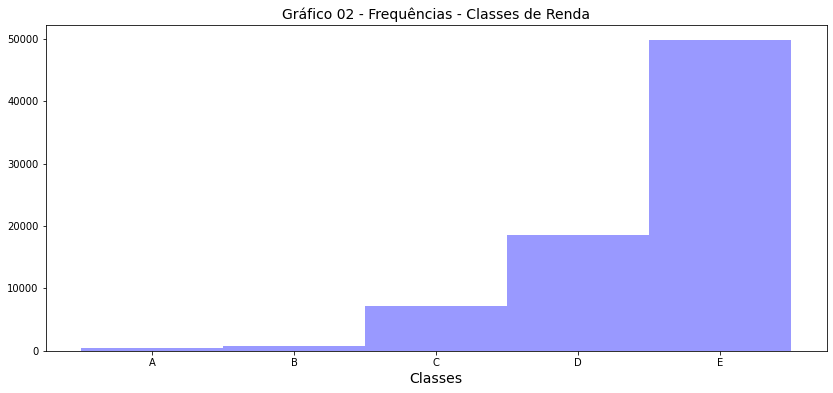

In [125]:
ax = dist_freq_income.Frequencies.plot.bar(width=1,color='blue', alpha=0.4)
ax.figure.set_size_inches(14, 6)
ax.set_title('Gráfico 02 - Frequências - Classes de Renda', fontsize=14)
ax.set_xlabel('Classes', fontsize=14)
plt.xticks(rotation=360)
ax;

Avaliando a porcentagem de pessoas que ganham o valor do salário mínimo ou abaixo dele:

In [73]:
percentageMinimumWage  = stats.percentileofscore(data.Income, 788, kind = 'weak')
print("{0:.2f}%".format(percentageMinimumWage))

28.87%


### Conclusão
- Um grande número de pessoas se encontram na classe E, cerca de 64.75% (cerca de 49 755 pessoas).
- 28.87% das pessoas ganham o salário mínimo ou abaixo dele (cerca de 22 184 pessoas, o que representa 44,59% das pessoas presentes na classe E).
- Uma pequena parcela se encontra na classe A (0.54%) e classe B (1.06%), o que já mostra uma grande desigualdade na distribuição de renda.

### Avaliando a distribuição de frequência da Renda:

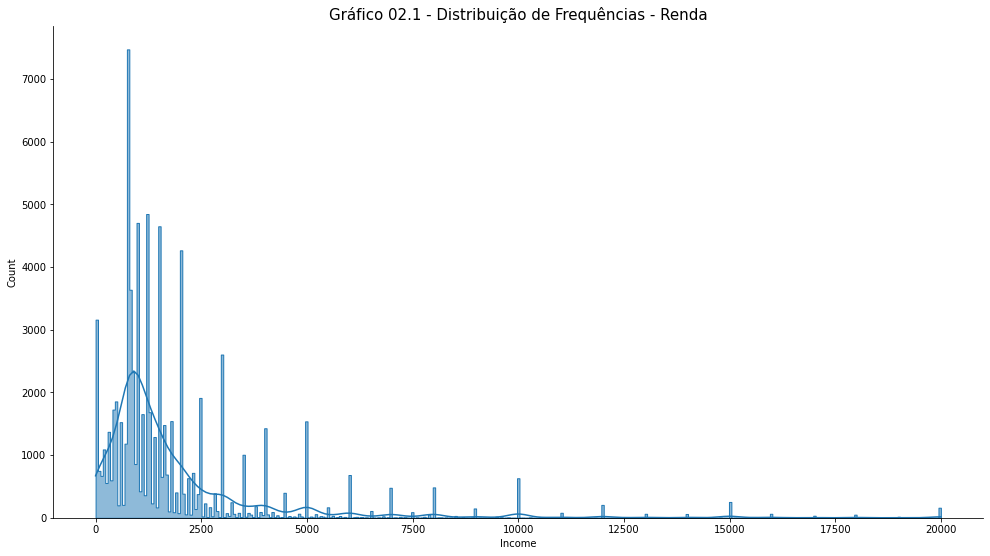

In [145]:
g = sb.displot(data.query('Income <=20000').Income, 
               element="step", 
               kde=True, 
               palette='blue')
g.fig.set_figwidth(16)
g.fig.set_figheight(8)
plt.title('Gráfico 02.1 - Distribuição de Frequências - Renda', size=15)
plt.show()

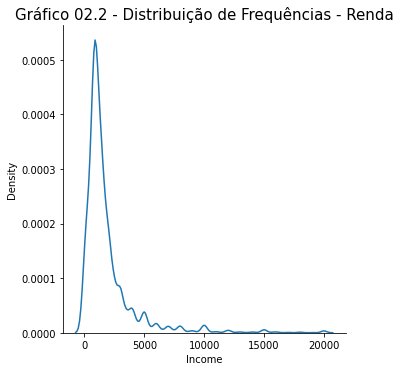

In [146]:
sb.displot(data.query('Income <=20000').Income, kind ='kde')
g.fig.set_figwidth(16)
g.fig.set_figheight(8)
plt.title('Gráfico 02.2 - Distribuição de Frequências - Renda', size=15)
plt.show()

In [76]:
data.Income.mean()

2000.3831988547631

In [77]:
data.Income.median()

1200.0

In [78]:
data.Income.mode()[0]

788

In [79]:
data.Income.mad()

1526.4951371644931

In [80]:
data.Income.std()

3323.3877303470294

In [81]:
data.Income.var()

11044906.00622118

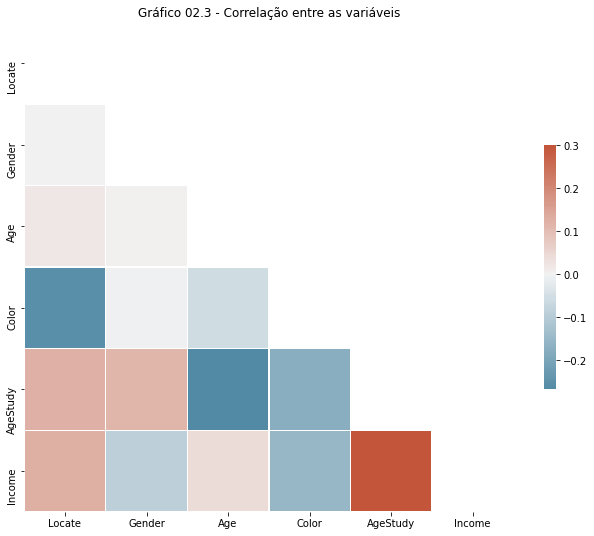

In [147]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Gráfico 02.3 - Correlação entre as variáveis')
plt.show()

### Conclusão
- Existe uma assimetria à direita, o que é um reflexo do que já observamos anteriormente, devido ao grande número de pessoas presentes na classe E (ganhando a baixo de 2 salários mínimos) comparado as classes que possuem um ganho salarial maior. Perbemos, pelo valor da variância, a pouca uniformidade da distribuição da renda. 
- Existe uma grande correlação da variável de Renda com as variáveis de **Anos de Estudo**, **Localização** e **Idade**.

## Renda em relação a Cor de Pele

In [124]:
countColor = data['Color'].value_counts().sort_index(ascending=True)
countColor.rename(color, inplace=True)
countColor

Indígena      357
Branca      31815
Preta        8391
Amarela       352
Parda       35925
Name: Color, dtype: int64

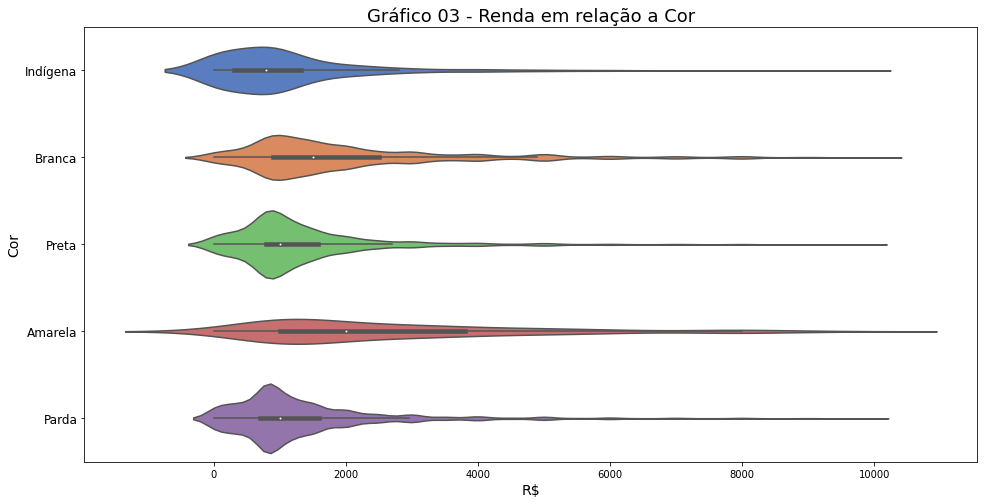

In [126]:
ax = sb.violinplot(x = 'Income', y = 'Color', orient='h',
                    data=data.query('Income < 10000'), 
                   palette="muted", 
                   split=True)
ax.figure.set_size_inches(16, 8)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14) 
ax.set_yticklabels([key for key in color.values()], fontsize=12)
plt.title('Gráfico 03 - Renda em relação a Cor', fontsize=18)
plt.show()

### Conclusões
- A quantidade de pessoas presente na cor Amarela é aproximadamente idêntico a quantidade presente na cor Indígena. No entanto, podemos observar no gráfico 03 a maior concentração de renda na cor indígena, enquanto na Amarela observamos uma melhor distribuição na renda.
- Observamos também que a cor Amarela possui a maior mediana de renda.
- Tanto a amarela como a Branca demoram mais para afunilar comparada as outras cores, o que mostra que essas duas cores possuem uma parcela de pessoas com maiores ganhos salariais.

## Renda em relação ao Gênero

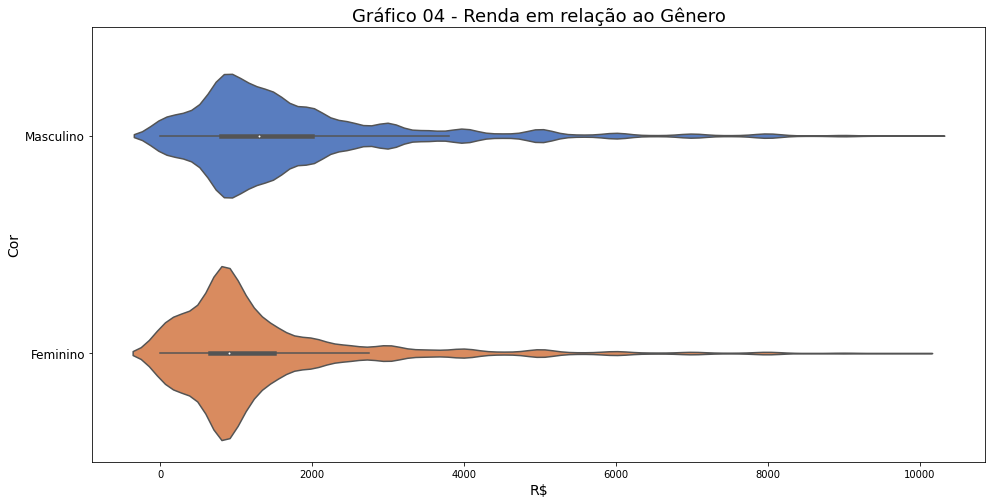

In [127]:
ax = sb.violinplot(x = 'Income', y = 'Gender', orient='h',
                    data=data.query('Income < 10000'), 
                   palette="muted", 
                   split=True)
ax.figure.set_size_inches(16, 8)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14) 
ax.set_yticklabels(['Masculino',  'Feminino'], fontsize=12)
plt.title('Gráfico 04 - Renda em relação ao Gênero', fontsize=18)
plt.show()

### Conclusões
- A mediana de Renda do gênero masculino é menor que o feminino. Além disso, observamos que, em média, homens possuem um ganho superior ao das mulheres. 
- Para rendas maiores, vemos uma maior densidade no gênero masculino comparado ao feminino (como mostra o gráfico 04).

## Renda em relação ao Gênero e Cor

In [82]:
genderColorPerIncome = pd.crosstab(data.Color, data.Gender, values=data.Income, aggfunc={'mean', 'median', 'max'})
genderColorPerIncome.rename(index = color, inplace = True)
genderColorPerIncome.rename(columns = gender, inplace = True)
genderColorPerIncome

max                   mean                 median         
Gender   Masculino  Feminino    Masculino     Feminino Masculino Feminino
Color                                                                    
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

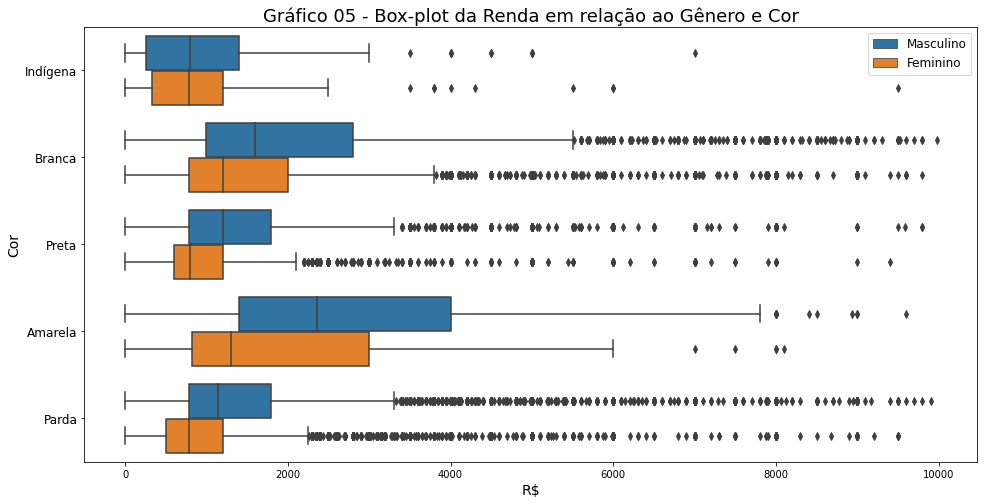

In [128]:
ax = sb.boxplot(x = 'Income', y = 'Color', hue = 'Gender', 
                data=data.query('Income < 10000'), orient='h')
ax.figure.set_size_inches(16, 8)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14) 
ax.set_yticklabels([key for key in color.values()], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
plt.title('Gráfico 05 - Box-plot da Renda em relação ao Gênero e Cor', fontsize=18)
plt.show()

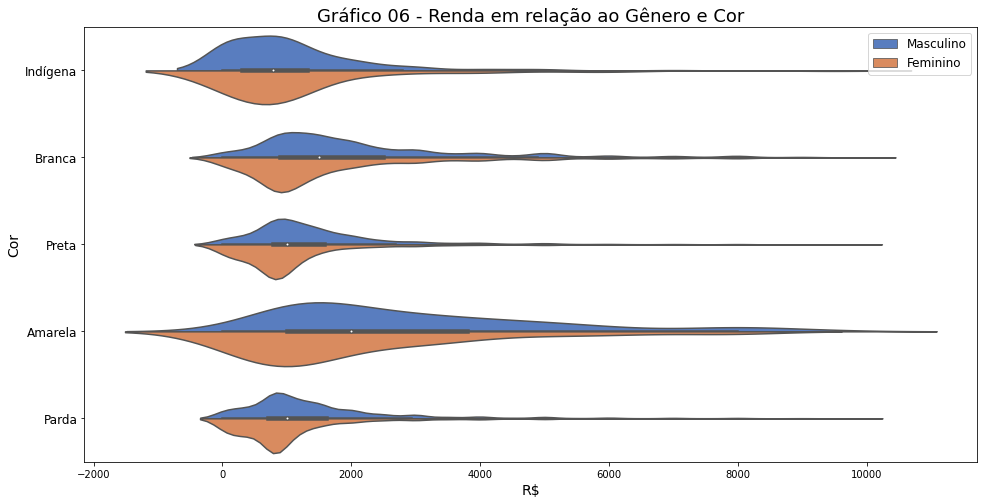

In [130]:
ax = sb.violinplot(x = 'Income', y = 'Color', hue = 'Gender', 
                data=data.query('Income < 10000'), orient='h', 
                palette="muted", split=True)
ax.figure.set_size_inches(16, 8)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14) 
ax.set_yticklabels([key for key in color.values()], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
plt.title('Gráfico 06 - Renda em relação ao Gênero e Cor', fontsize=18)
plt.show()

### Conclusões
- Reforço das conclusões anteriores. 
- Podemos facilmente ver que para a cor **Amarela**, tanto para homens como para mulheres, ocorre uma melhor distribuição da renda. 
- Na cor **Branca** e **Parda** vemos algo mais concentrado no gênero feminino do que no masculino (que é mais distribuído).
- Para as cores **pretas** e **indigenas** temos uma distribuição aproximadamente semelhante para ambos os gêneros, tendo também uma rápido "afunilamento", o que mostra que não existe uma grande densidade de pessoas com altos ganhos de renda. 

## Renda em relação aos Anos de Estudo

In [118]:
countAgeStudy = data['AgeStudy'].value_counts().sort_index(ascending=True)
countAgeStudy.rename(ageStudy, inplace=True)
countAgeStudy

Sem instrução e menos de 1 ano     5849
1 ano                              1388
2 anos                             2101
3 anos                             2891
4 anos                             6729
5 anos                             4499
6 anos                             2445
7 anos                             2689
8 anos                             7980
9 anos                             1840
10 anos                            2118
11 anos                           20848
12 anos                            1836
13 anos                            1253
14 anos                            1388
15 anos ou mais                   10795
Não determinados                    191
Name: AgeStudy, dtype: int64

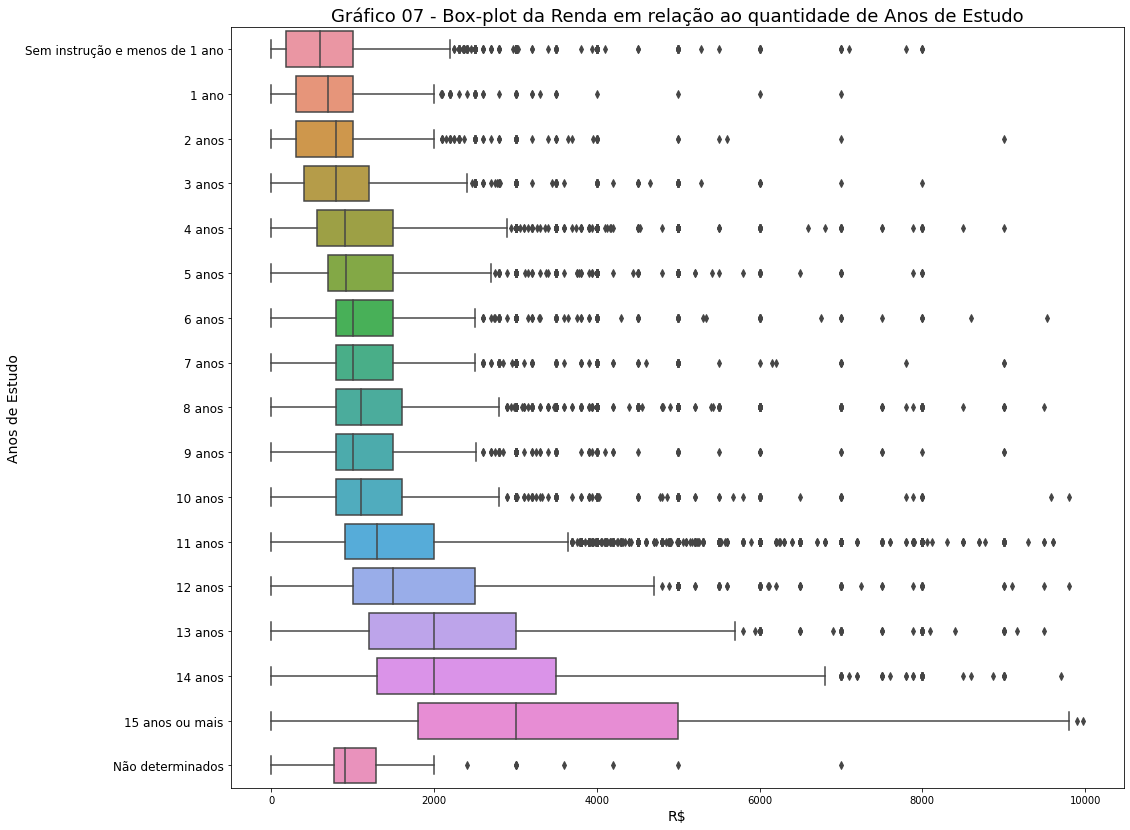

In [132]:
ax = sb.boxplot(x = 'Income', y = 'AgeStudy', data=data.query('Income < 10000'), orient='h')
ax.figure.set_size_inches(16, 14)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14) 
ax.set_yticklabels([key for key in ageStudy.values()], fontsize=12)
plt.title('Gráfico 07 - Box-plot da Renda em relação ao quantidade de Anos de Estudo', fontsize=18)
plt.show()

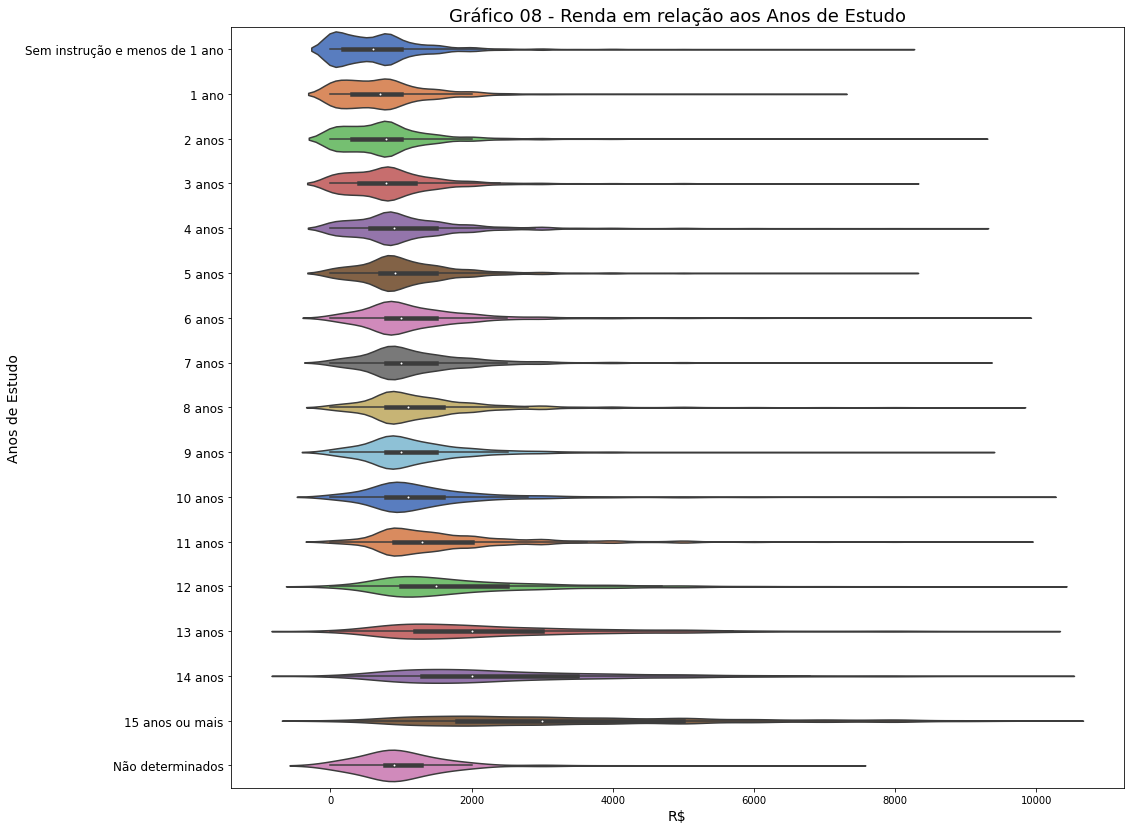

In [133]:
ax = sb.violinplot(x = 'Income', y = 'AgeStudy', orient='h',
                    data=data.query('Income < 10000'), 
                   palette="muted", 
                   split=True)
ax.figure.set_size_inches(16, 14)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14) 
ax.set_yticklabels([key for key in ageStudy.values()], fontsize=12)
plt.title('Gráfico 08 - Renda em relação aos Anos de Estudo', fontsize=18)
plt.show()

### Conclusões
- Pessoas com maiores tempos de estudo possuem, em média, maiores ganhos salariais. Conseguimos observar uma maior mediana para **15 anos ou mais** de estudo comparado aos outros casos.
- A medida que vai aumentando os anos de estudo podemos ver uma melhor distribuição da renda. Enquanto para os casos de menores quantidades de anos de estudo observamos uma maior densidade dos dados.

## Renda em relação aos Anos de Estudo e Gênero

In [119]:
genderStudyPerIncome = pd.crosstab(data.AgeStudy, data.Gender, values=data.Income, aggfunc={'mean', 'median', 'max', 'std'})
genderStudyPerIncome.rename(index = ageStudy, inplace = True)
genderStudyPerIncome.rename(columns = gender, inplace = True)
genderStudyPerIncome

max            ...          std             
Gender                         Masculino  Feminino  ...    Masculino     Feminino
AgeStudy                                            ...                          
Sem instrução e menos de 1 ano   30000.0   10000.0  ...  1023.904884   639.311534
1 ano                            30000.0    2000.0  ...  1331.950552   425.291842
2 anos                           40000.0    4000.0  ...  1435.173827   498.234168
3 anos                           80000.0    3500.0  ...  2143.800133   424.124446
4 anos                           50000.0   10000.0  ...  1419.821787   629.553397
5 anos                           35000.0    8000.0  ...  1484.650587   635.782641
6 anos                           25000.0    6000.0  ...  1476.628602   574.547028
7 anos                           40000.0    9000.0  ...  1419.708673   602.038029
8 anos                           30000.0   18000.0  ...  1515.583715   896.781213
9 anos                           60000.0   20000.0  ...  2137.664774   973.221652
10 anos                          45000.0    6000.0  ...  2078.609734   620.611907
11 anos                         200000.0  100000.0  ...  2676.538942  1819.040417
12 anos                          30000.0  120000.0  ...  2268.081538  4851.833513
13 anos                          25000.0   20000.0  ...  2797.116800  2053.789771
14 anos                          50000.0   20000.0  ...  3987.214974  2064.083336
15 anos ou mais                 200000.0  100000.0  ...  7447.613594  4212.770709
Não determinados                  7000.0    3000.0  ...   979.648745   459.985964

[17 rows x 8 columns]

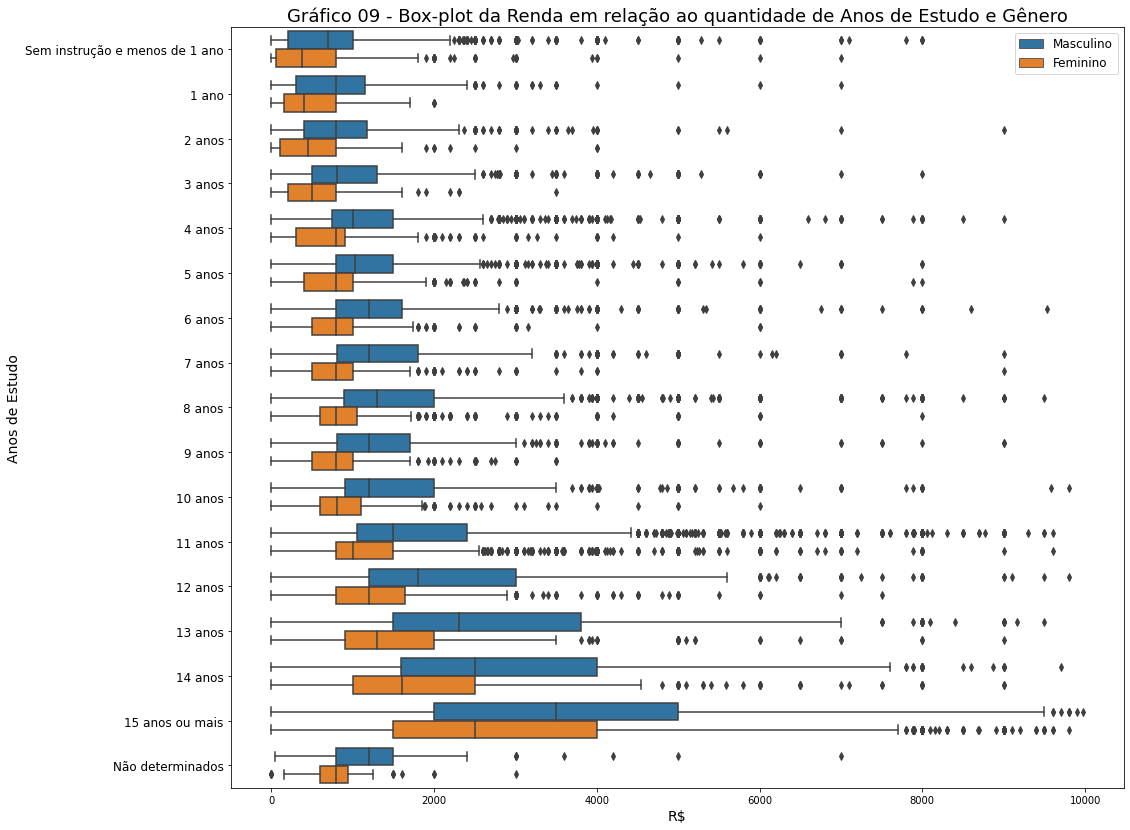

In [134]:
ax = sb.boxplot(x = 'Income', y = 'AgeStudy', hue = 'Gender', data=data.query('Income < 10000'), orient='h')
ax.figure.set_size_inches(16, 14)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14) 
ax.set_yticklabels([key for key in ageStudy.values()], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
plt.title('Gráfico 09 - Box-plot da Renda em relação ao quantidade de Anos de Estudo e Gênero', fontsize=18)
plt.show()

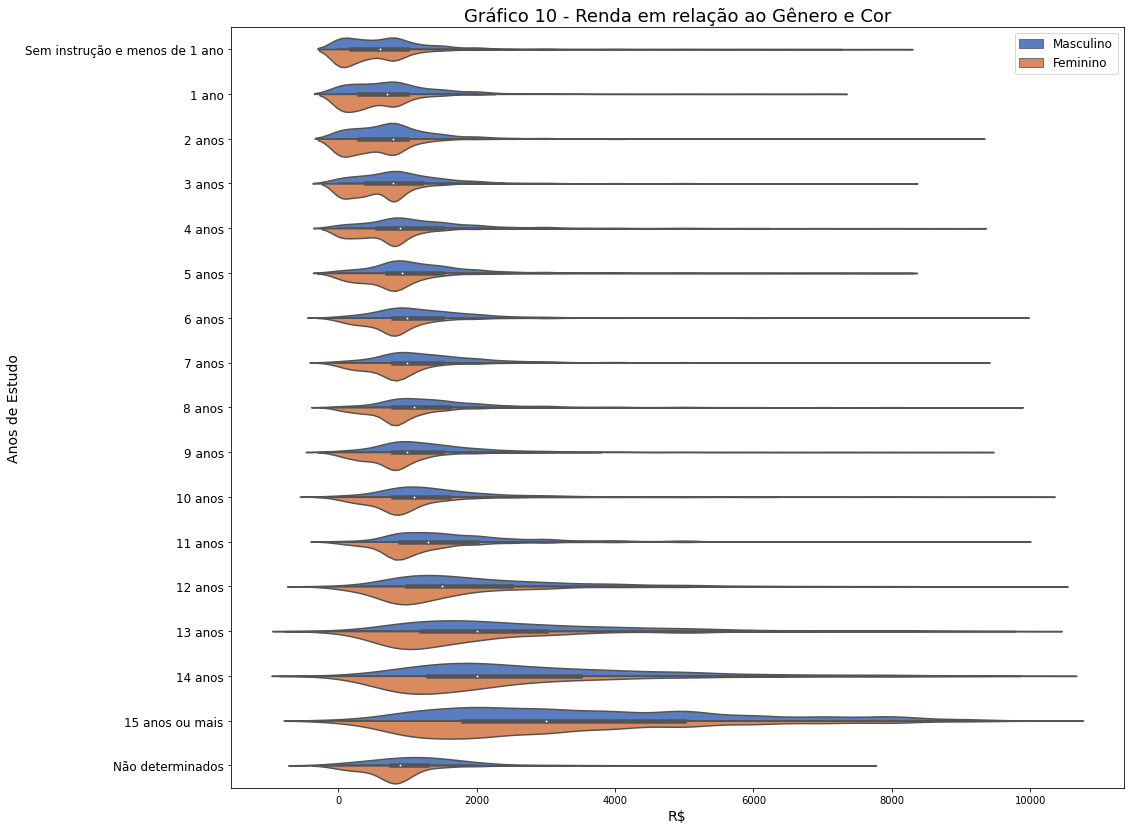

In [137]:
ax = sb.violinplot(x = 'Income', y = 'AgeStudy', hue = 'Gender', 
                data=data.query('Income < 10000'), orient='h', 
                palette="muted", split=True)
ax.figure.set_size_inches(16, 14)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14) 
ax.set_yticklabels([key for key in ageStudy.values()], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
plt.title('Gráfico 10 - Renda em relação ao Gênero e Cor', fontsize=18)
plt.show()

### Conclusões
- Confirmação das conclusões anteriores.
- No geral, o gênero **masculino** possui um ganho médio salarial superior ao gênero **feminimo**.
- Pessoas com mais anos de dedicação aos estudos possuem uma maior média de renda comparada as pessoas com uma quantidade inferior de anos de estudo.
- Apesar de termos a 2° maior quantidade de pessoas com **15 anos ou mais** de estudo, podemos perceber que o desvio padrão é um dos maiores. O que é reforçado no gráfico 10, onde vemos uma melhor distribuição dos dados. 
- No geral, o gênero **masculino** possui uma melhor distribuição dos dados, sendo perceptível (via gráfico 10) uma maior concentração no gênero **feminimo**.
- Existe um desvio padrão menor no gênero **feminino** do que no **masculino**.

## Renda por Estado

In [87]:
IncomePerLocation = data.groupby(['Locate']).agg({'Income': ['mean', 'median', 'max', 'std']})
IncomePerLocation.rename(index = locate)

Income                            
                            mean median     max          std
Locate                                                      
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

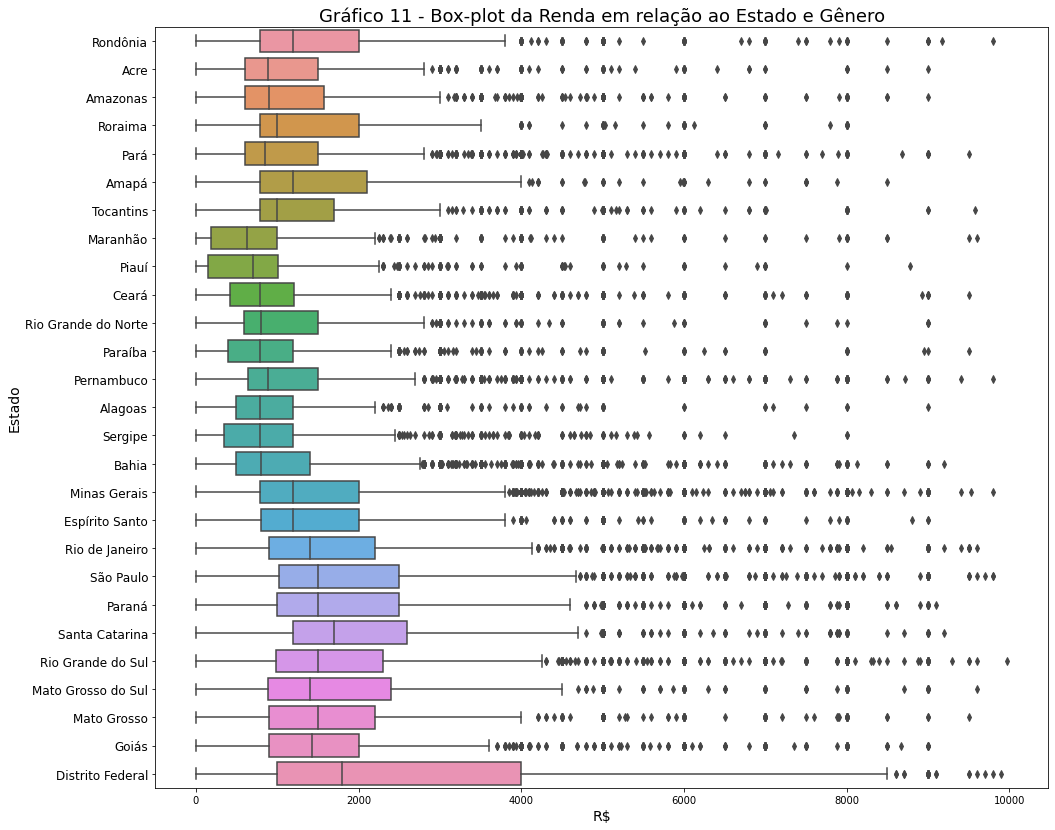

In [139]:
ax = sb.boxplot(x = 'Income', y = 'Locate', data=data.query('Income < 10000'), orient='h')
ax.figure.set_size_inches(16, 14)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Estado', fontsize=14) 
ax.set_yticklabels([key for key in locate.values()], fontsize=12)
plt.title('Gráfico 11 - Box-plot da Renda em relação ao Estado e Gênero', fontsize=18)
plt.show()

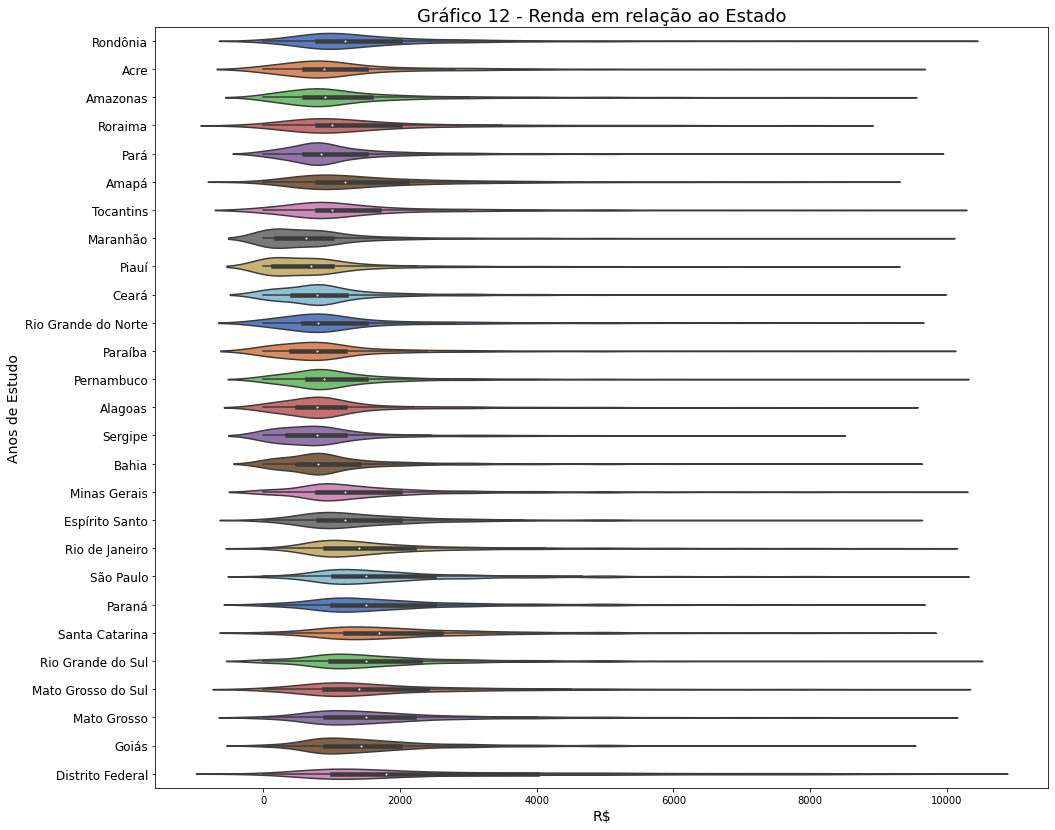

In [140]:
ax = sb.violinplot(x = 'Income', y = 'Locate', orient='h',
                    data=data.query('Income < 10000'), 
                   palette="muted", 
                   split=True)
ax.figure.set_size_inches(16, 14)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14) 
ax.set_yticklabels([key for key in locate.values()], fontsize=12)
plt.title('Gráfico 12 - Renda em relação ao Estado', fontsize=18)
plt.show()

### Conclusões
- As pessoas da base residentes no **Piauí** e no **Maranhão** possuem os menores ganhos médios salariais comparado aos outros estados.
- As pessoas da base residentes no **Distrito Federal** possuem os maiores ganhos médios salariais. 
- Os dados de Renda coletados no **Distrito Federal** possuem o maior desvio padrão, em comparação aos outros estados. O que é reforçado no gráfico 12, onde vemos o **Distrito Federal** com uma melhor distribuição dos dados.
- Os dados de renda coletados em **Alagoas** possuem um menor desvio padrão, em comparação aos outros estados.

## Renda por Idade

In [151]:
IncomePerAge = data[((data.Age >= 18) & (data.Age <=60))].groupby(['Age']).agg({'Income': ['mean', 'median', 'max', 'std']})
IncomePerAge

Income                             
            mean  median     max          std
Age                                          
18    866.844595   800.0    2200   400.194625
19    996.158654   867.5    5000   601.749951
20   1075.360704   900.0   25000  1480.679439
21   1036.687500   950.0    6000   623.408962
22   1152.852041  1000.0    7800   738.232384
23   1144.481586  1000.0    6000   697.872837
24   1331.799043  1100.0    9500   964.454778
25   1461.453347  1100.0   48000  1950.460377
26   1535.659300  1160.0   22000  1515.437994
27   1586.639742  1200.0   45000  1929.825149
28   1610.475852  1200.0   15000  1560.725863
29   1834.782609  1200.0   40000  2346.497889
30   1754.729792  1200.0   30000  1879.441444
31   1836.494226  1200.0   27000  2065.774278
32   2016.584012  1200.0   35000  2531.154572
33   1987.346078  1300.0   50000  2520.741754
34   2055.052358  1250.0   30000  2618.023963
35   1923.755213  1200.0   30000  2212.545417
36   1998.695528  1200.0   35000  2555.114108
37   2005.855928  1300.0   30000  2338.576577
38   2090.483749  1300.0   36000  2755.295520
39   2009.790411  1300.0   80000  3181.000686
40   2021.069819  1300.0   60000  2927.428125
41   2134.967099  1300.0   28000  2731.786496
42   2075.241663  1200.0  200000  4923.869866
43   2099.048803  1300.0   80000  3093.810569
44   2163.166330  1300.0   43000  3247.476027
45   2134.415111  1300.0   32000  2937.514398
46   2206.753142  1300.0  100000  3545.018221
47   2153.069451  1300.0   35000  2813.035888
48   2191.471253  1300.0   33000  2999.305539
49   2072.940926  1300.0   50000  2881.845757
50   2375.944979  1300.0   48000  3509.084847
51   2306.809744  1200.0  200000  5664.325511
52   2250.954779  1200.0   45000  3430.195729
53   2333.898268  1300.0  120000  4395.508223
54   2102.748974  1200.0   35000  3098.371922
55   2208.200114  1200.0   40000  3397.435455
56   2177.406356  1200.0   32000  3248.629344
57   2190.560376  1200.0   50000  3483.957980
58   2102.381057  1200.0   90000  4042.030217
59   2147.547847  1200.0   50000  3461.609020
60   1927.506173  1000.0   34000  3128.198849

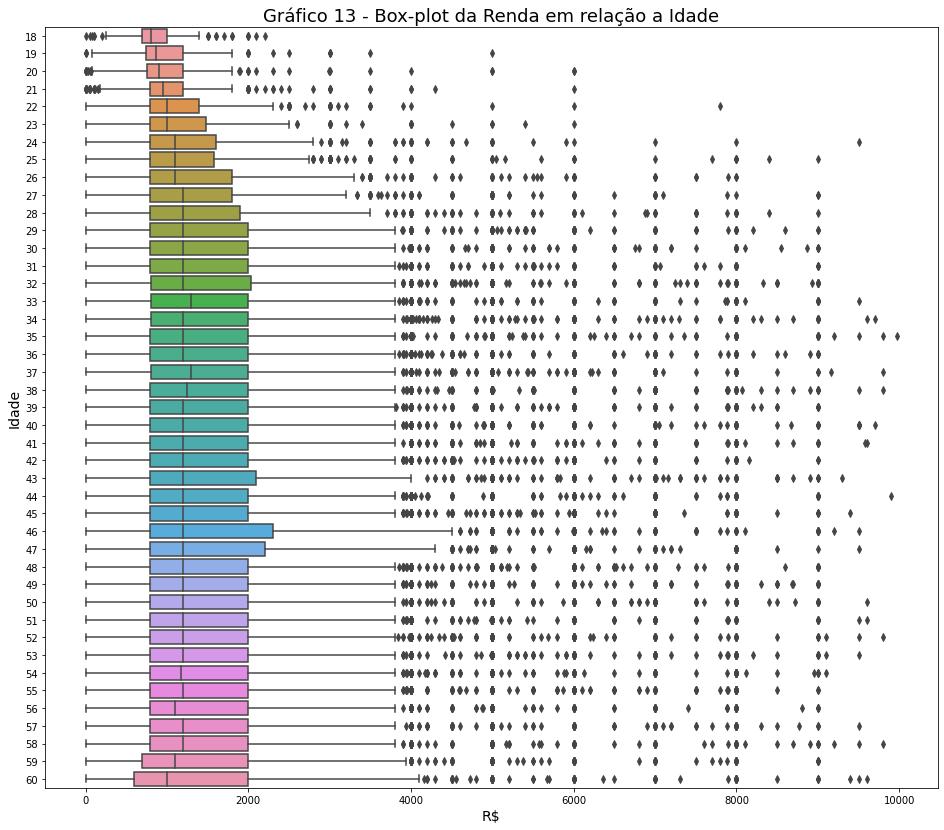

In [154]:
ax = sb.boxplot(x = 'Income', y = 'Age', data=data.query('Income < 10000 and Age >= 18 and Age <=60'), orient='h')
ax.figure.set_size_inches(16, 14)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Idade', fontsize=14) 
plt.title('Gráfico 13 - Box-plot da Renda em relação a Idade', fontsize=18)
plt.show()

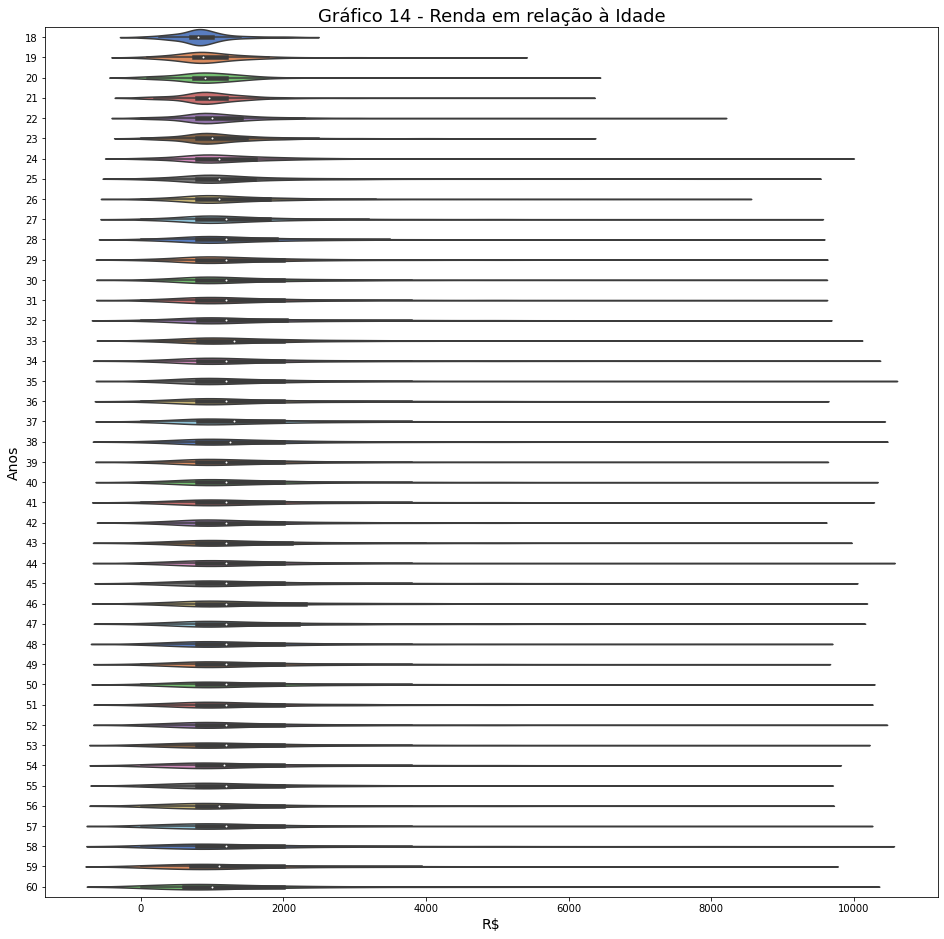

In [157]:
ax = sb.violinplot(x = 'Income', y = 'Age', orient='h',
                   data=data.query('Income < 10000 and Age >= 18 and Age <=60'), 
                   palette="muted", 
                   split=True)
ax.figure.set_size_inches(16, 16)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos', fontsize=14) 
plt.title('Gráfico 14 - Renda em relação à Idade', fontsize=18)
plt.show()

### Conclusões
- Observando o gráfico 13 juntamente com o 14, vemos que as idades maiores possuem, em média, maiores ganhos salariais, além de uma melhor distribuição dos dados.
- Dos **18 aos 23 anos**, vemos uma leve concentração de dados. A medida que avança a idade os dados se encontram melhores distribuidos. Isso é reforçado com o desvio padrão, em que os menores se encontram nesse "range" de idades.

# Finalização
Esta foi o projeto de Análise Discritiva, onde coloquei em prática alguns fundamentos de Estatística para avaliarmos algumas características da variável renda em relação as demais presentes nessa base de dados. Qualquer detalhe ou feedback para melhorar o meu trabalho é sempre aceito, basta me enviar uma mensagem.